## Parse results from algos

In [1]:
import numpy as np
import numba as nb
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../../src/')
import networkx as nx

In [2]:
import io_m.libsaving as libsaving
import io_m.io_utils as io_utils

from importlib import reload

from epigen import epidemy_gen

from epigen import EpInstance

In [ ]:
type_graph="RRG"
#seed=7
seed=8
N=100
d=10
height=3
lam=0.035
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.6,0.4]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=1

gamma=None
small_lambda_limit=0
path_contacts=" "

In [ ]:
### NEW RRG (changed the test probabilities)
type_graph="RRG"
#seed=7
seed=8
N=100
d=10
height=3
lam=0.035
#lam=0.038
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.4, 0.5, 0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=1
last_time_obs=False

gamma=None
small_lambda_limit=0
path_contacts=" "
scale=None

seeds=range(1,101)


In [ ]:
### NEW RRG with 2 src last obs
CASE="RRG with 2 src last obs"
type_graph="RRG"
#seed=7
seed=5
N=100
d=10
height=3
lam=0.03
#lam=0.038
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.4, 0.5, 0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=2

gamma=None
small_lambda_limit=0
path_contacts=" "
scale=None

last_time_obs=True

seeds=range(0,101)

In [3]:
### NEW RRG with 1 src last obs
type_graph="RRG"
#seed=7
seed=5
N=100
d=10
height=3
lam=0.035
#lam=0.038
mu=0.
t_limit=15
p_edge=1
#sparse observ
pr_sympt=0.5
n_test_rnd=1
#n_test_rnd=0
p_test_delay=[0, 0.4, 0.5, 0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
nsrc=1

gamma=None
small_lambda_limit=0
path_contacts=" "
scale=None
CASE="RRG with 1 src last obs"

last_time_obs=True

seeds=range(0,100)
## mettere dopo 101

In [5]:
type_graph="proximity"
CASE=f"{type_graph} with 1 src last obs 2nd try"

seed=9
N=100
d=10
lam=0.03
mu=0.
t_limit=15
p_edge=1

height=3

gamma=1e-3
small_lambda_limit=0
path_contacts="../../results/patient_zero/work/work_13_contacts.npz"
#sparse observ
pr_sympt=0.5
nsrc=1

scale=2
#n_test_rnd=3
n_test_rnd=1
p_test_delay=[0, 0.2, 0.5,0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)
seeds=list(range(0,100))
#for s in range(15,20):
#    seeds.remove(s)

last_time_obs=True

In [ ]:
## WORK CONTACTS ONE SOURCE
type_graph="i_bird"
seed=4
N=100
d=10
height=3
lam=0.03
mu=0.
t_limit=12
p_edge=1
nsrc=1

gamma=1e-3
small_lambda_limit=0
path_contacts="../../results/patient_zero/work/work_13_contacts.npz"
#sparse observ
pr_sympt=0.5
#n_test_rnd=3
n_test_rnd=1
p_test_delay=[0, 0.4,0.5,0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)

last_time_obs = False

In [70]:
## WORK CONTACTS 1 src LAST OBS
type_graph="i_bird"
seeds=[6]
N=100
d=10
height=3
lam=0.03
mu=0.
t_limit=12
p_edge=1
nsrc=1

gamma=1e-3
small_lambda_limit=0
path_contacts="../../results/patient_zero/work/work_13_contacts.npz"
#sparse observ
pr_sympt=0.5
#n_test_rnd=3
n_test_rnd=0
p_test_delay=[0, 0.4,0.5,0.6]
p_test_delay = np.array(p_test_delay)/sum(p_test_delay)

last_time_obs = True
scale=None

In [ ]:
#seeds = range(1,101)
#seeds =range(0,101)
#seeds=range(1,51)
# list(range(1,20))+list(range(30,51))

#seeds=range(0,80)

# for RRG 2 src last obs
#seeds=list(seeds)
#seeds.remove(29)

In [71]:
INSTANCES = {s: EpInstance(type_graph, N, d, t_limit, 
                                    lam, mu, s, float(p_edge), 
                                    n_source=nsrc) for s in seeds}

In [5]:
str(INSTANCES[1])

KeyError: 1

In [6]:
extra_gen = {"h":height,
            "scale":scale}

extra_gen.update({"gamma":gamma, 
                  "small_lambda_limit":small_lambda_limit, 
                  "path_contacts": path_contacts})

In [72]:
num_conf=100
#num_conf=1
start_conf=0

In [73]:
%%capture
reload(epidemy_gen)
DATA_ALL = {s: 
            epidemy_gen.epidemy_gen_epinstance(inst, 
                                               lim_infected=1, num_conf=num_conf,
                                               extra_gen=extra_gen, 
                                               verbose=False,
                                              num_sources=nsrc) 
            for s, inst in INSTANCES.items()}

In [74]:
confs={s: np.array(mdata["test"]) for s, mdata in DATA_ALL.items()}

final_confs = {
    s: c[...,1,:] for s, c in confs.items()
} #np.stack(tuple(confs.values()) )[...,1,:]


idx_source = {k: np.stack((np.where(c[0]==1)[0] for c in x)) for k, x in confs.items()}

/home/fmazza/app/miniconda3/envs/torche/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


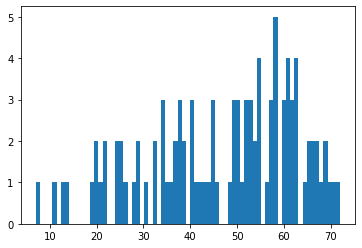

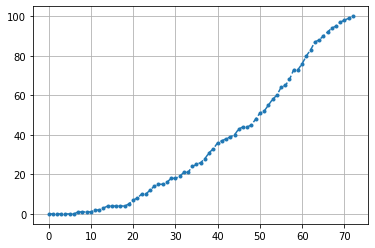

In [75]:
r = np.stack(tuple(final_confs.values())).sum(-1).flatten()
plt.figure()
plt.hist(r,bins=max(r)+1)

plt.figure()
x,vals = np.unique(r, return_counts=True)
allvals = np.zeros(max(x)+1)
allvals[x] = vals
plt.plot(allvals.cumsum(),".--")
plt.grid()

In [76]:
Nfin_real = np.stack([ [(fin_conf==i).sum(-1) for i in range(3)] 
                      for s, fin_conf in final_confs.items()],1).reshape(3,-1).T

In [77]:
Nfin_real.shape

(100, 3)

In [11]:
from io_m import read_results

from epigen import generators

from analysis import risk_pred

from epigen import gen_observ

In [12]:
if last_time_obs:
    test_gen = lambda dat, t, s: gen_observ.make_sparse_obs_last_t(
                                            dat,t, pr_sympt,seed=s,
                                               verbose=False, numeric_obs=True)
else:
    test_gen = lambda dat, t, s: gen_observ.make_sparse_obs_default(
                        dat, t, n_test_rnd,
                        seed=s,
                        pr_sympt=pr_sympt, 
                        p_test_delay=p_test_delay, 
                    verbose=False, numeric_obs=True)

test_gen, last_time_obs

(<function __main__.<lambda>(dat, t, s)>, True)

In [13]:
len(DATA_ALL)

1

In [14]:
EPIDEMIES = {s: generators.calc_epidemies(mdata["epidemy"], mdata["test"], t_limit) 
             for s, mdata in DATA_ALL.items()}
"""
rdf, rjson = gen_observ.make_sparse_obs_default(mdata, INSTANCE.t_limit, 
                                               n_test_rnd, pr_sympt, 
                                               p_test_delay,seed, False, numeric_obs=True)
"""
##LAST TIME

OBSERV_ALL = {s:
              test_gen(mdata, INSTANCES[s].t_limit, s=s,)[0] 
            for s, mdata in DATA_ALL.items()}

In [24]:
OBS_STATS = pd.concat([epidemy_gen.make_stats_observ(np.array(DATA_ALL[s]["test"]),
                                 OBSERV_ALL[s], obs_key="obs") 
 for s in sorted(DATA_ALL.keys())], ignore_index=True)

In [25]:
OBS_STATS["seed"] = seeds

ValueError: Length of values (1) does not match length of index (100)

In [ ]:
OBS_STATS.plot(x="seed",y=["num_inf_guess"], style=".")
plt.grid()

In [26]:
OBS_STATS[OBS_STATS.num_inf_guess < 2]

,num_inf,num_inf_obs,num_inf_guess,sources


## Read marginals

In [15]:
from io_m import read_results

In [16]:
def load_many_inst(method, folder, instances, *args, **kwargs):
    #if "legacy" in kwargs.keys():
    #    for inst in 
    return {s: method(folder, inst, *args,**kwargs) for s, inst in instances.items()}

In [17]:
margs_all = {}

In [18]:
reload(read_results)

<module 'io_m.read_results' from '../../src/io_m/read_results.py'>

In [19]:
for inst in INSTANCES.values():
    inst.p_edge=float(inst.p_edge)

In [20]:
confs_load=(start_conf,num_conf)

In [21]:
if not last_time_obs:
    name = f"{type_graph}_{n_test_rnd}rnd_" #psus06_"
else:
    name = f"{type_graph}_lastobs_"#psus06_"
print(name)
    
folder=f"sib/{type_graph}_{nsrc}src/"
#folder=f"sib/{INSTANCE.type_graph}_nsrc{nsrc}/"

i_bird_lastobs_


In [ ]:
## sib

In [ ]:
margs_all["sib_psus70_psrc2"] =load_many_inst(read_results.read_sib_data_def,
                                        #"sib/{type_graph}_nsrc1/",
                                        f"sib/{type_graph}_{nsrc}src/",
                                        #f"sib/{type_graph}/",
                                        INSTANCES, height, name+"psus07_psrc2_",
                                        range_confs=confs_load, outprint=False)

In [23]:
## sib work
margs_all["sib_psus70_psrc2"] =load_many_inst(read_results.read_sib_data_def,
                                        #"sib/{type_graph}_nsrc1/",
                                        f"sib/{type_graph}_{nsrc}src/",
                                        #f"sib/{type_graph}/",
                                        INSTANCES, height, name+"psus07_src2_",
                                        range_confs=confs_load, outprint=False)

### ANN RRG 1 src random obs in time

In [ ]:
margs_all["ann_psus06_lexp"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_SI",
                                        INSTANCES,
                                        prefix=f"10kst10ks_{n_test_rnd}rnd_6lexp_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        n_end=num_conf)

In [ ]:
instances_ann_1 = {k: INSTANCES[k] for k in filter(lambda x: x < 51, INSTANCES.keys())}
instances_ann_2 = {k: INSTANCES[k] for k in filter(lambda x: x >= 51, INSTANCES.keys())}

In [ ]:
for inst in instances_ann_1.values():
    inst.legacy(False)
margs_all["ann_psus06_4lpow"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_SI",
                                        INSTANCES,
                                        prefix=f"10kst10ks_{n_test_rnd}rnd_4lpow2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load)
for inst in instances_ann_1.values():
    inst.legacy(True)

## ANN RRG 1 src last obs

In [27]:
margs_all["ann_psus06_4lpow"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [28]:
margs_all["ann_psus07_4lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix="10kst10ks_lastobs_4lpow_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [29]:
margs_all["ann_psus07_3lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/RRG_1src/3lpow1/",
                                        INSTANCES,
                                        prefix="10kst10ks_lastobs_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

## ANN RRG 2 src last obs

In [ ]:
margs_all["ann_psus06_4lpow"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [ ]:
margs_all["ann_psus07_4lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [ ]:
CASE

In [ ]:
margs_all.keys()

## ANN proximity 1 src last obs

In [30]:
margs_all["ann_psus07_4lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/good_new/{type_graph}_{nsrc}src",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

In [31]:
margs_all["ann_psus07_3lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        f"ann/proximity_1src/lastobs",
                                        INSTANCES,
                                        prefix=f"10kst10ks_3lpow1_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=False)

### ANN Work 1 src last obs

In [24]:
margs_all["ann_psus07_4lpow_psrc2"] = load_many_inst(read_results.read_margs_inst,
                                        "ann/good_new/i_bird_1src/",
                                        INSTANCES,
                                        prefix=f"10kst10ks_lastobs_4lpow_psus07_psrc2_",
                                        #prefix=f"psrc4_{n_test_rnd}rnd_newfin06Bal_",
                                        range_confs=confs_load, outprint=True)


/home/fmazza/projects/epi_nn_new/nnepi_res/results/risk_assessment/ann/good_new/i_bird_1src
range(0, 100)


## Read risks from estimators

In [25]:
reload(read_results)
risks_all = {}

In [26]:
if last_time_obs:
    name_rankers=f"lastobs_tau4_d10_"
else:
    name_rankers=f"{n_test_rnd}rnd_tau4_d10_"
print(name_rankers)

lastobs_tau4_d10_


In [27]:
risks_all["MF"] = load_many_inst(read_results.read_risk_inst,
                                 #f"rankers/good_new/{type_graph}",
                                 f"rankers/good/{type_graph}_{nsrc}src",
                                            INSTANCES, "MF",
                                            prefix=name_rankers,
                                            range_confs=confs_load, outprint=False)

In [28]:
risks_all["CT"] = load_many_inst(read_results.read_risk_inst,
                                 #f"rankers/good_new/{type_graph}",
                                 f"rankers/good/{type_graph}_{nsrc}src",
                                            INSTANCES, "CT",
                                            prefix=name_rankers,
                                            range_confs=confs_load, outprint=False)

In [29]:
def calc_all_rocs(margs, fin_conf, obs_all_df, instance):
    margs_diff =[]
    for i, conf_fin in enumerate(fin_conf):
        nidx = get_obs_idx(obs_all_df[i])
        sel_idx = set(range(instance.n)).difference(nidx)
        errs = get_err_rocs(margs[i], sel_idx, conf_fin)
        margs_diff.append(np.array(errs))
        
    return margs_diff

## Aggregated things

In [30]:
Nfin = {k: np.stack(tuple(mar.values()))[...,-1,:].sum(-2).reshape(-1,3) for k,mar in margs_all.items()}

In [31]:
Ninit = {k: np.stack(tuple(mar.values()))[...,0,:].sum(-2).reshape(-1,3) for k,mar in margs_all.items()}

In [33]:
margs_all.keys()

dict_keys(['sib_psus70_psrc2', 'ann_psus07_4lpow_psrc2'])

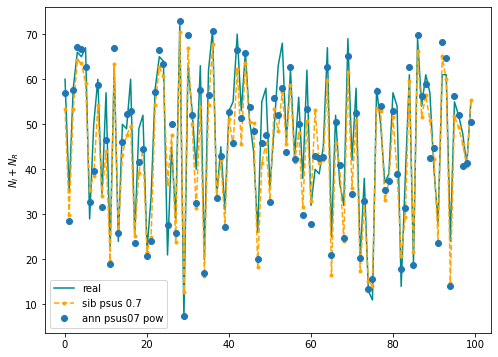

In [79]:
plt.figure(figsize=(8,6))

#plt.plot(margs_run[:,-1,1:].sum(-1),"--",label="10k steps mc -7 no netobs")
#plt.plot(margs_run_mc10[:,-1,1],"-",label="10k steps mc -10 no netobs")
plt.plot(Nfin_real[:,1:].sum(-1), label="real", color="darkcyan")
#plt.plot(Nfin["sib"][:,1:].sum(-1),".--",color="black",label="sib")
#plt.plot(Nfin["sib_psus60"][:,1:].sum(-1),".--",color="firebrick",label="sib psus 0.6")
plt.plot(Nfin["sib_psus70_psrc2"][:,1:].sum(-1),".--",color="orange",label="sib psus 0.7")
#plt.plot(Nfin["sib_psus65"][:,1:].sum(-1),".--",color="mediumpurple",label="sib psus 0.65")

#plt.plot(Nfin["ann_pfinLin"][:,1:].sum(-1),"o-",color="darkcyan",label="ann pfin Lin")

#plt.plot(Nfin["ann_psus06_lexp"][:,1:].sum(-1),"o",label="ann psus06 exp new")
#plt.plot(Nfin["ann_psus06_4lpow"][:,1:].sum(-1),"o",label="ann psus06 pow")
plt.plot(Nfin["ann_psus07_4lpow_psrc2"][:,1:].sum(-1),"o",label="ann psus07 pow")

#plt.plot(Nfin["ann_psus07_3lpow_psrc2"][:,1:].sum(-1),"+",label="ann psus07 3lpow ")

#plt.plot(Nfin["ann_psus06_pow_nn"][:,1:].sum(-1),"o",label="ann psus06 pow new")


#plt.xlim((-0.2,))


plt.ylabel("$N_I + N_R$")
plt.legend()


In [80]:
aucs_all = {name: 
            np.array([
                risk_pred.calc_aucs(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s]) 
                 for s in sorted(INSTANCES.keys())
            ]).flatten()
            for name, margs in margs_all.items()}

In [81]:
aucs_all.update({name: 
            np.array([
                risk_pred.calc_aucs_risks(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s]) 
                 for s in sorted(INSTANCES.keys())
            ]).flatten()
            for name, margs in risks_all.items()} )

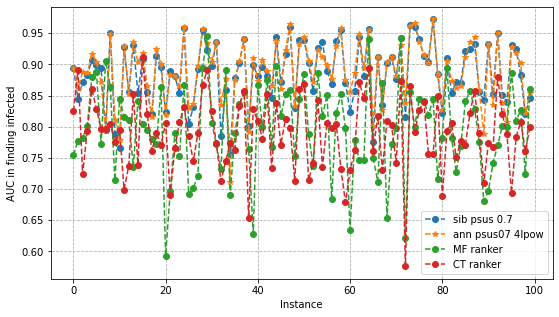

In [82]:
plt.figure(figsize=(9,5))
#plt.plot(aucs_all["sib"], "*--",label="sib", color="black")
#plt.plot(aucs_all["sib_psus60"], "o--",label="sib psus 0.6")
plt.plot(aucs_all["sib_psus70_psrc2"], "o--",label="sib psus 0.7")

#plt.plot(aucs_all["ann_psus06_lexp"],"*-",label="ann psus06 6lexp")

#plt.plot(aucs_all["ann_psus06_4lpow"],"o--",label="ann psus06 4lpow")
plt.plot(aucs_all["ann_psus07_4lpow_psrc2"],"*--",label="ann psus07 4lpow")



plt.plot(aucs_all["MF"], "o--", label="MF ranker")

#plt.plot(aucs_ranks["MF_cho"], "*--", label=f"MF ch_obs ranker")

plt.plot(aucs_all["CT"], "o--", label="CT ranker")
#plt.plot(aucs_ranks["CT_cho"], "*--", label="CT ch_obs ranker")
#plt.plot(aucs_all["ann_psus06_pow"],"*--",label="ann psus06 4lpow")


#plt.plot([1], [auc(rocs_1_m[0],rocs_1_m[1])], "o", label="big net")

plt.legend()
"""plt.xlim((-0.5,4.5))
plt.ylim((0.3
          ,0.83))"""
plt.ylabel("AUC in finding infected")
plt.xlabel("Instance")
plt.grid(linestyle="--")
#plt.savefig(f"auc_{str(INSTANCE)}.svg", bbox_inches="tight")

In [83]:
avg = {name: np.nanmean(r)
              for name, r in aucs_all.items()}
err_avg = {name: np.nanstd(r)/np.sqrt(len(r) - np.isnan(r).sum())
              for name, r in aucs_all.items()}

for k in sorted(avg.keys()):
    print(f"{k}: {avg[k]:5.3f} \pm {err_avg[k]:5.3f}")

CT: 0.790 \pm 0.006
MF: 0.796 \pm 0.007
ann_psus07_4lpow_psrc2: 0.889 \pm 0.005
sib_psus70_psrc2: 0.886 \pm 0.005


In [84]:
aucs_df =pd.DataFrame(aucs_all).dropna(how="all", axis=0)

In [85]:
len(aucs_df)

100

In [86]:
name_out=f"{type_graph}_n_{N}_{nsrc}src_"
if last_time_obs:
    name_out=name_out+f"lastobs_"
else:
    name_out=name_out+f"{n_test_rnd}rnd_"
print(name_out)

i_bird_n_100_1src_lastobs_


In [87]:
aucs_df.to_csv("res_plot/"+name_out+"aucs.csv", index=False)

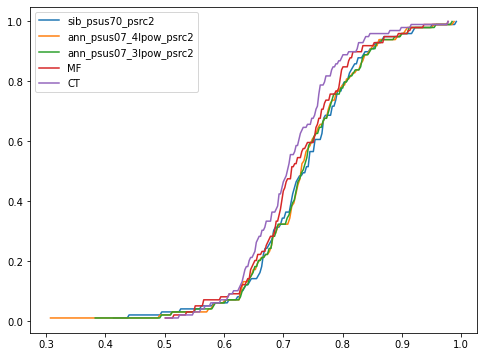

In [50]:
from analysis.generic import filter_nans, histo_points

pdfs_aucs = {name: histo_points(filter_nans(r), bins=200)
              for name, r in aucs_all.items()}
#del pdfs_aucs["ann_psus06_lexp"]
plt.figure(figsize=(8,6))
for k, dr in pdfs_aucs.items():
    plt.plot(dr[0],dr[1].cumsum()/dr[1].sum(), label=k)

plt.legend()


In [282]:
reload(risk_pred)

<module 'analysis.risk_pred' from '../../src/analysis/risk_pred.py'>

In [88]:
probs_infect = {name: 
            [
                risk_pred.get_probs_inf(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s],
                                       risk_pred.ResType.margs) 
                 for s in sorted(INSTANCES.keys())
            ]
            for name, margs in margs_all.items()}
probs_infect.update({name: 
            [
                risk_pred.get_probs_inf(margs[s],final_confs[s], OBSERV_ALL[s], INSTANCES[s],
                                       risk_pred.ResType.risks) 
                 for s in sorted(INSTANCES.keys())
            ]
            for name, margs in risks_all.items()}
                   )

In [89]:
from sklearn.metrics import roc_curve

In [90]:
from scipy import interp

In [91]:
aucs_rocs_all = {k: risk_pred.calc_rocs_aucs(v,100) for k,v in probs_infect.items()}

In [92]:
aucs_stats={k:(np.mean(v[0]),np.std(v[0])) for k,v in aucs_rocs_all.items()}

In [93]:
aucs_stats

{'sib_psus70_psrc2': (0.8857898023763421, 0.049655331883336505),
 'ann_psus07_4lpow_psrc2': (0.8887717122430548, 0.0494097421199388),
 'MF': (0.796314968268083, 0.07275191940009587),
 'CT': (0.7895211209807413, 0.05732536920609314)}

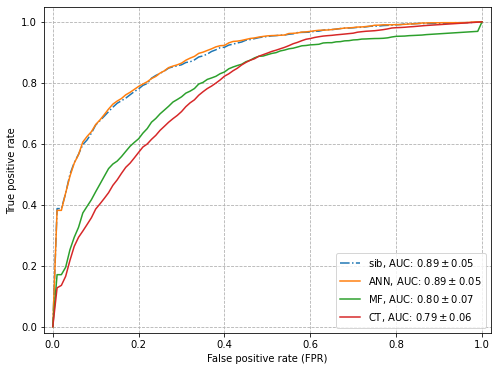

In [140]:
xplt = np.linspace(0,1,101)
plt.figure(figsize=(8,6))



plt.plot(xplt, np.mean(aucs_rocs_all["sib_psus70_psrc2"][1],0), "-.",
         label="sib, AUC: ${:.2f}\pm{:.2f}$".format(*aucs_stats["sib_psus70_psrc2"]))
plt.plot(xplt, np.mean(aucs_rocs_all["ann_psus07_4lpow_psrc2"][1],0), 
         label="ANN, AUC: ${:.2f}\pm{:.2f}$".format(*aucs_stats["ann_psus07_4lpow_psrc2"]))
plt.plot(xplt, np.mean(aucs_rocs_all["MF"][1],0), 
         label="MF, AUC: ${:.2f}\pm{:.2f}$".format(*aucs_stats["MF"]))

plt.plot(xplt, np.mean(aucs_rocs_all["CT"][1],0), 
         label="CT, AUC: ${:.2f}\pm{:.2f}$".format(*aucs_stats["CT"]))
plt.ylim((-.02,None))
plt.xlim((-.02,1.02))
plt.grid(linestyle="--")
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate")
plt.legend()

plt.savefig(f"img/{name_out}_rocs_avg.svg",bbox_inches="tight")

In [97]:
def maxarrel(r, el=0):
    try:
        return max((len(f[0]) for f in r))
    except TypeError:
        print([(f[0]) for f in r])
        return (len(r[0]))
        #raise InterruptedError

num_max = max([maxarrel(g) for g in probs_infect["MF"]])

In [98]:
TOT_POINTS = 200
def count_found_all(risk_i, nmax=None):
    #print(risk_i.shape)
    #g = np.stack(risk_i,1).astype(np.float_)
    res_out = []
    vals = np.unique(risk_i[0])
    #if len(vals) < len(risk_i[0]):
    #    print("Have {} less values".format(len(risk_i[0])-len(vals)))
    #print(len(vals),len(risk_i), end="\t")
    for i in range(20):
        idx = np.argsort(risk_i[0])[::-1]

        #g.view("f8,f8").sort(axis=0, order="f0")
        count = risk_i[1][idx]

        nfind = len(count)

        points = np.linspace(1,TOT_POINTS, nfind)
        #discr_points = (points * TOT_POINTS).astype(int)
        resu = np.zeros(TOT_POINTS+1)

        resu[points.astype(int)] = count
    
        res_out.append(resu.cumsum())
    return np.stack(res_out).mean(0)
    
    

In [99]:
normalize = lambda x: x/np.max(x)*100

In [100]:
risks_all.keys()

dict_keys(['MF', 'CT'])

In [102]:
ninst=num_conf

mg = lambda x,y: [normalize(count_found_all(r,y)) for r in x[:ninst]]

In [103]:
counted_probs = {
    name: [mg(r, num_max) for r in res] for name, res in probs_infect.items() 
}

In [104]:
counted_all =counted_probs

In [105]:
from sklearn.metrics import auc

aucs_find = {k: np.array([
                    [auc(np.linspace(0,1,len(x)), x/100) for x in v] 
                          for v in mar ]).flatten() for k,mar in counted_all.items()}

In [106]:
labels={k: "${:4.3f} \pm {:4.3f}$".format(
    np.nanmean(x),np.nanstd(x)/np.sqrt(np.prod(x.shape)-np.isnan(x).sum())) for k,x in aucs_find.items()}

In [107]:
res_m = {name: 
         np.nanmean(
             np.stack(x).reshape(-1,TOT_POINTS+1),
             axis=0)
         for name,x in counted_all.items()}

In [108]:
from sklearn.metrics import auc

auc_risk2 = {name: auc(np.linspace(0,1,len(x)),x/100) for name,x in res_m.items()}

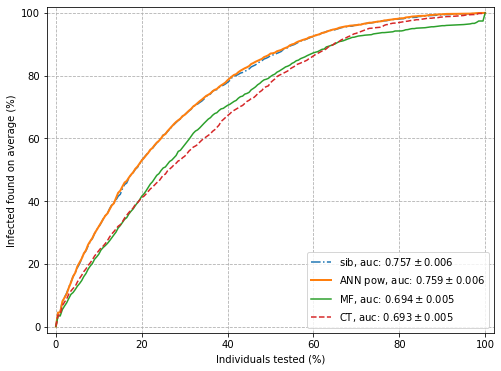

In [139]:
plt.figure(figsize=(8,6))
#for name,x in avg_count_probs.items():
#    plt.plot(x, label=name)
#    print()
#for name,x in avg_count_risk.items():
#    plt.plot(x, label=name)
#plt.plot(ul.mean(0))
x_data = np.linspace(0,100,TOT_POINTS+1)

#plt.plot(x_data, res_m["sib_psus60"], label="BP, auc: {:4.3f}".format(auc_risk2["sib_psus60"]))
v="sib_psus70_psrc2"
plt.plot(x_data, res_m[v],"-.", label="sib, auc: {}".format(labels[v]))

#plt.plot(x_data, res_m["ann_psus06_lexp"], label="ANN, auc: {}".format(labels["ann_psus06_lexp"]))
v="ann_psus07_4lpow_psrc2"
plt.plot(x_data, res_m[v], label="ANN pow, auc: {}".format(labels[v]), linewidth=2)

plt.plot(x_data, res_m["MF"], label="MF, auc: {}".format(labels["MF"]))
plt.plot(x_data, res_m["CT"],"--", label="CT, auc: {}".format(labels["CT"]))


plt.legend()
plt.xlabel("Individuals tested (%)")
plt.ylabel("Infected found on average (%)")
plt.ylim((-2,102))
plt.xlim((-2,102))

plt.grid(linestyle="--")
plt.savefig(f"img/{name_out}auc_infected.svg",bbox_inches="tight")

In [ ]:
plt.figure(figsize=(8,6))
#for name,x in avg_count_probs.items():
#    plt.plot(x, label=name)
#    print()
#for name,x in avg_count_risk.items():
#    plt.plot(x, label=name)
#plt.plot(ul.mean(0))
x_data = np.linspace(0,100,TOT_POINTS+1)

#plt.plot(x_data, res_m["sib_psus60"], label="BP, auc: {:4.3f}".format(auc_risk2["sib_psus60"]))
plt.plot(x_data, res_m["sib_psus60"], label="BP, auc: {}".format(labels["sib_psus60"]))

plt.plot(x_data, res_m["ann_psus06_lexp"], label="ANN, auc: {}".format(labels["ann_psus06_lexp"]))
plt.plot(x_data, res_m["ann_psus06_pow"], label="ANN pow, auc: {}".format(labels["ann_psus06_pow"]))

plt.plot(x_data, res_m["MF"], label="MF, auc: {}".format(labels["MF"]))
plt.plot(x_data, res_m["CT"], label="CT, auc: {}".format(labels["CT"]))
"""
plt.plot(x_data,res_m["ann_psus06_lexp"], label="ANN, auc: {:4.3f}".format(auc_risk2["ann_psus06_lexp"]))


plt.plot(x_data,res_m["MF"], label="MF, auc: {:4.3f}".format(auc_risk2["MF"]))
plt.plot(x_data,res_m["CT"], label="CT, auc: {:4.3f}".format(auc_risk2["CT"]))

"""

plt.legend()
plt.xlabel("Percentage of individuals tested")
plt.ylabel("Perc infected found on average")
plt.grid(linestyle="--")
plt.savefig(f"auc_infected_{type_graph}.svg",bbox_inches="tight")

In [ ]:
alg = "ann_psus06_lexp"
plt.plot(counted_all[alg][0][0])
plt.plot(counted_all[alg][1][0])
plt.plot(counted_all[alg][2][0])
plt.plot(counted_all[alg][3][0])

## Patient zero

In [111]:
sources = {s:
    np.stack( [np.where(np.array(c[0])==1)[0] for c in mdata["test"] ])
           for s, mdata in DATA_ALL.items()}

In [112]:
from sklearn.metrics import auc, roc_curve

In [113]:
def get_source_rank(m, msources):
    psources = m[:,0,1]
    idx=psources.argsort()[::-1]

    rg = sum(((idx == s for s in msources)))
    #print(rg)
    return rg.cumsum()

def get_sources_auc(m, msources):
    psources = m[:,0,1]
    idx=psources.argsort()[::-1]
    truey = np.zeros(psources.shape, dtype=int)
    #rg = sum(((idx == s for s in msources)))
    truey[msources] = 1
    #print(rg)
    fpr,tpr,thr= roc_curve(truey, psources)#rg.cumsum()
    return auc(fpr,tpr)

In [114]:
pzero_accu = {name: 
            np.stack([
                np.array([get_source_rank(m,source) 
                          for m, source in zip(marg[s], sources[s])])
                for s in sources.keys()
            ]).sum(0).sum(0)
            for name, marg in margs_all.items()}

In [121]:
pzero_auc = {name: 
            np.stack([
                np.array([get_sources_auc(m,source) for m, source in zip(marg[s], sources[s])])
                for s in sources.keys()
            ]).flatten()
            for name, marg in margs_all.items()}

ann_psus07_4lpow_psrc2, 0.766 \pm 0.023 
sib_psus70_psrc2, 0.754 \pm 0.024 


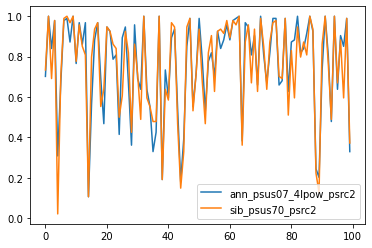

In [123]:
for k in sorted(pzero_auc.keys()):
    aal = pzero_auc[k]
    print("{}, {:4.3f} \pm {:4.3f} ".format(
        k, np.nanmean(aal), np.nanstd(aal)/np.sqrt(np.prod(aal.shape)-np.isnan(aal).sum()))
    )
    plt.plot(aal, label=k)
    
plt.legend()

In [132]:
INSTANCES[6].n

95

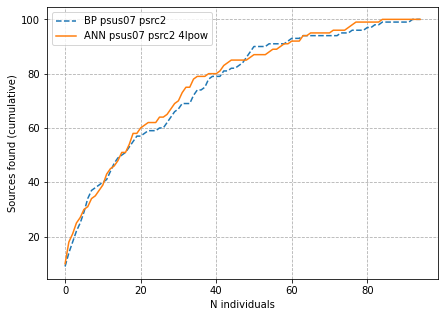

In [138]:
plt.figure(figsize=(7,5))
#for name,x in avg_count_probs.items():
#    plt.plot(x, label=name)
#    print()
#for name,x in avg_count_risk.items():
#    plt.plot(x, label=name)
#plt.plot(ul.mean(0))
x_data = np.arange(tuple(INSTANCES.values())[0].n)
#plt.plot(x_data,pzero_accu["sib_psus60"], "--",label="BP")
plt.plot(x_data,pzero_accu["sib_psus70_psrc2"], "--",label="BP psus07 psrc2")
#, auc: {:4.3f}".format(auc_risk2["sib_psus60"]))
l = "ann_"
#plt.plot(x_data,pzero_accu["ann_psus06_4lpow"], label="ANN")#, auc: {:4.3f}".format(auc_risk2["ann_psus06Fin"]))

plt.plot(x_data,pzero_accu["ann_psus07_4lpow_psrc2"], label="ANN psus07 psrc2 4lpow")

#plt.plot(x_data,pzero_accu["ann_psus07_3lpow_psrc2"], label="ANN psus07 psrc2 3lpow")


plt.legend()
plt.ylabel("Sources found (cumulative)")
plt.xlabel("N individuals")
plt.grid(linestyle="--")

In [133]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94])

In [ ]:
pzero_counts_df = pd.DataFrame(pzero_accu)
pzero_counts_df.to_csv(name_out+"pzero_count.csv", index=False)

In [ ]:
pzero_counts_df = pd.DataFrame(pzero_auc)
pzero_counts_df.to_csv(name_out+"pzero_aucs.csv", index=False)

## Graph analysis

In [ ]:
Gtry = DATA_ALL[2]["G"]

In [ ]:
n_edges = len(nx.DiGraph(Gtry).edges)

In [ ]:
Gtry

In [ ]:
Gtry = nx.random_regular_graph(6, 50)
len(Gtry.nodes)

In [ ]:
nx.average_clustering(Gtry)

In [ ]:
idx = 44
neighs = tuple(Gtry.neighbors(idx))

neighs2 = {k:tuple(Gtry.neighbors(k)) for k in neighs}

neighs_f = {k:tuple(filter(lambda x : x in neighs, Gtry.neighbors(k)) ) for k in neighs}

In [ ]:
other_neighs = set()
for i in neighs:
    for j in neighs:
        if i==j: 
            continue
        res = set(neighs2[i]).intersection(neighs2[j])
        if len(res) > 0:
            other_neighs = other_neighs.union(res)

In [ ]:
comm_union = set()
for l in neighs2.values():
    comm_union = comm_union.union(l)

In [ ]:
len(comm_union)

In [ ]:
len(other_neighs)

In [ ]:
pos = nx.spring_layout(Gtry, iterations=1000,k=3, threshold=1e-5)

In [ ]:
nx.draw(Gtry,nodelist=list(filter(lambda x: x<idx,comm_union)), pos=pos)
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=[idx],node_color="red")
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=list(filter(lambda x: x<idx,neighs)),node_color="green")

In [ ]:
nx.draw(Gtry,nodelist=list(filter(lambda x: x<idx,other_neighs)), pos=pos)
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=[idx],node_color="red")
nx.draw_networkx_nodes(Gtry,pos=pos, nodelist=list(filter(lambda x: x<idx,neighs)),node_color="green")